# Testing functions in epydemiology

## Import epydemiology
(All other packages will be imported or reported missing.)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd

import epydemiology as epy

## Some background details

In [ ]:
help(epy)

In [ ]:
print(dir(epy))

---

## FILE: phjGetData.py

### FUNCTION: phjReadDataFromExcelNamedCellRange()

In [ ]:
phjPath = "/Users/philipjones/Documents/git_repositories/epydemiology"
phjFileName = "Test data.xlsx"

import pandas as pd
import openpyxl
import epydemiology as epy

print("RANGE: some_test_data")
print("=====================")
myDF = epy.phjReadDataFromExcelNamedCellRange(phjExcelPathAndFileName = '/'.join([phjPath,phjFileName]),
                                              phjExcelCellRangeName = 'some_test_data',
                                              phjDatetimeFormat = "%d%b%Y",
                                              phjMissingValue = "missing",
                                              phjHeaderRow = True,
                                              phjPrintResults = True)

print(myDF.dtypes)

print('\n')

print("RANGE: some_more_test_data")
print("==========================")
myDF2 = epy.phjReadDataFromExcelNamedCellRange(phjExcelPathAndFileName = '/'.join([phjPath,phjFileName]),
                                               phjExcelCellRangeName = 'some_more_test_data',
                                               phjDatetimeFormat = "%Y-%m-%d",
                                               phjMissingValue = "missing",
                                               phjHeaderRow = True,
                                               phjPrintResults = True)

print(myDF.dtypes)

---

## FILE: phjGetDBData.py

### FUNCTION: phjConnectToDatabase()

In [ ]:
import pymysql
import pymssql
import epydemiology as epy

tempConn = epy.phjConnectToDatabase('mysql')

print(tempConn)

### FUNCTION: phjGetDataFromDatabase()

#### Example 1 – Query stored in file

In [ ]:
# The following external libraries are imported automatically but are incuded here for completeness.
import pandas as pd
import pymysql
import pymssql
import epydemiology as epy

myDF = epy.phjGetDataFromDatabase(phjQueryPathAndFile = '/Users/username/Desktop/theSQLQueryFile.mssql',
                                  phjPrintResults = True)

#### Example 2 – Query entered directly in function call

In [ ]:
# The following external libraries are imported automatically but are incuded here for completeness.
import pandas as pd
import pymysql
import pymssql
import epydemiology as epy

myDF = epy.phjGetDataFromDatabase(phjQueryStr = 'SELECT * FROM Table1',
                                  phjPrintResults = True)

---

## FILE: phjMiscFuncs.py

### FUNCTION: phjGetStrFromArgOrFile()

### FUNCTION: phjReadTextFromFile()

In [ ]:
myStr = epy.phjReadTextFromFile(phjFilePathAndName = '/Users/username/Desktop/myTextFile.txt',
                                phjMaxAttempts = 3,
                                phjPrintResults = False)

### FUNCTION: phjCreateNameGroupRegex()

#### phjRegexPreCompile parameter set to `False`

In [6]:
import numpy as np
import pandas as pd
import re
import epydemiology as epy

df = pd.DataFrame({'id':[2,2,2,1,1],
                   'group':['dog','dog','dog','cat','cat'],
                   'regex':['(?:dog)','(?:canine)','(?:k9)','(?:cat)','(?:feline)']})

print("Dataframe\n---------")
print(df)

regexStr = epy.phjCreateNamedGroupRegex(phjDF = df,
                                        phjGroupVarName = 'group',
                                        phjRegexVarName = 'regex',
                                        phjIDVarName = 'id',
                                        phjRegexPreCompile = False,
                                        phjPrintResults = False)

print("\nCombined Regex string\n---------------------")
print(regexStr)

Dataframe
---------
   id group       regex
0   2   dog     (?:dog)
1   2   dog  (?:canine)
2   2   dog      (?:k9)
3   1   cat     (?:cat)
4   1   cat  (?:feline)

Combined Regex string
---------------------
(?P<cat>
    (?:cat)|
    (?:feline))|
(?P<dog>
    (?:dog)|
    (?:canine)|
    (?:k9))


#### phjRegexPreCompile parameter set to `True`

In [8]:
df = pd.DataFrame({'id':[2,2,2,1,1],
                   'group':['dog','dog','dog','cat','cat'],
                   'regex':['(?:dog)','(?:canine)','(?:k9)','(?:cat)','(?:feline)']})

print("Dataframe\n---------")
print(df)

myCompiledRegexObj = epy.phjCreateNamedGroupRegex(phjDF = df,
                                                  phjGroupVarName = 'group',
                                                  phjRegexVarName = 'regex',
                                                  phjIDVarName = 'id',
                                                  phjRegexPreCompile = True,
                                                  phjPrintResults = False)

print("\nCompiled Regex object\n---------------------")
print(myCompiledRegexObj)

Dataframe
---------
   id group       regex
0   2   dog     (?:dog)
1   2   dog  (?:canine)
2   2   dog      (?:k9)
3   1   cat     (?:cat)
4   1   cat  (?:feline)

Compiled Regex object
---------------------
re.compile('(?P<cat>\n    (?:cat)|\n    (?:feline))|\n(?P<dog>\n    (?:dog)|\n    (?:canine)|\n    (?:k9))', re.IGNORECASE|re.VERBOSE)


### FUNCTION: phjFindRegexNamedGroup()

### FUNCTION: phjMaxLevelOfTaxonomicDetail()

In [ ]:
import numpy as np
import pandas as pd
import collections

myOrderedDict = collections.OrderedDict()
myOrderedDict['Descriptor'] = ['dog','ferret','cat','rabbit','horse','primate','rodent','gerbil','guinea pig','rat','mammal','lizard','snake','common basilisk','turtle','tortoise','spur-thighed tortoise']
myOrderedDict['Phylum'] = ['Chordata','Chordata','Chordata','Chordata','Chordata','Chordata','Chordata','Chordata','Chordata','Chordata','Chordata','Chordata','Chordata','Chordata','Chordata','Chordata','Chordata']
myOrderedDict['Class'] = ['Mammalia','Mammalia','Mammalia','Mammalia','Mammalia','Mammalia','Mammalia','Mammalia','Mammalia','Mammalia','Mammalia','Reptilia','Reptilia','Reptilia','Reptilia','Reptilia','Reptilia']
myOrderedDict['Order'] = ['Carnivora','Carnivora','Carnivora','Lagomorpha','Perissodactyla','Primates','Rodentia','Rodentia','Rodentia','Rodentia','','Squamata','Squamata','Squmata','Testudines','Testudines','Testudines']
myOrderedDict['Suborder'] = ['','','Feliformia','','','','','','','','','Lacertilia','Serpentes','Iguania','','Cryptodira','Cryptodira']
myOrderedDict['Superfamily'] = ['','','','','','','','','','','','','','','','','']
myOrderedDict['Family'] = ['Canidae','Mustelidae','Felidae','Leporidae','Equidae','','','Muridae','Caviidae','Muridae','','','','Corytophanidae','','Testudinidae','Testudinidae']
myOrderedDict['Subfamily'] = ['','','','','','','','Gerbillinae','','Murinae','','','','','','','']
myOrderedDict['Genus'] = ['Canis','Mustela','Felis','Oryctolagus','Equus','','','','Cavia','Rattus','','','','Basiliscus','','','Testudo']
myOrderedDict['Species'] = ['lupus','putorius','silvestris','cuniculus','ferus','','','','porcellus','norvegicus','','','','basiliscus','','','graeca']
myOrderedDict['Subspecies'] = ['familiaris','furo','catus','','caballus','','','','','domestica','','','','','','','']

df = pd.DataFrame(myOrderedDict)

df = epy.phjMaxLevelOfTaxonomicDetail(phjDF = df,
                                      phjFirstCol = 'Phylum',
                                      phjLastCol = 'Subspecies',
                                      phjNewColName = 'max_tax_details',
                                      phjDropPreExisting = False,
                                      phjCleanup = True,
                                      phjPrintResults = False)

### FUNCTION: phjReverseMap()

#### Example 1 – exact string matches

In [ ]:
myDF = pd.DataFrame({'id':[1,2,3,4,5,6,7],
                     'var':['dogg','canine','cannine','catt','felin','cot','feline'],
                     'dog':[1,2,3,4,5,6,7]})

print(myDF)

d = {'dog':['dogg','canine','cannine'],
     'cat':['catt','felin','feline']}

In [ ]:
myDF = epy.phjReverseMap(phjDF = myDF,
                         phjMappingDict = d,
                         phjCategoryVarName = 'var',
                         phjMappedVarName = 'spp',
                         phjUnmapped = 'missing',
                         phjTreatAsRegex = False,
                         phjDropPreExisting = True,
                         phjPrintResults = True)

#### Example 2 – regex

In [ ]:
myDF = pd.DataFrame({'id':[1,2,3,4,5,6,7],
                     'var':['dogg','canine','cannine','catt','felin','cot','feline'],
                     'dog':[1,2,3,4,5,6,7]})

print(myDF)
print('\n')
       
d = {'dog':['(?:dog+)','(?:can*ine)'],
     'cat':['(?:cat+)','(?:fel+ine?)']}

print(d)

In [ ]:
myDF = epy.phjReverseMap(phjDF = myDF,
                         phjMappingDict = d,
                         phjCategoryVarName = 'var',
                         phjMappedVarName = 'new',
                         phjUnmapped = 'missing',
                         phjTreatAsRegex = True,
                         phjDropPreExisting = True,
                         phjPrintResults = True)

### FUNCTION: phjRetrieveUniqueFromMultiDataFrames()

#### Single dataframe

In [ ]:
phjTempDF = pd.DataFrame({'a':[1,2,3,4,5,6,1,2,3,4,5,6],
                          'b':['a','b','c','d','e','f','a','b','w','d','e','f']})

print('Single variable')
print('---------------')

phjOutDF = epy.phjRetrieveUniqueFromMultiDataFrames(phjDFList = [phjTempDF],
                                                    phjVarNameList = 'a',
                                                    phjSort = True,
                                                    phjPrintResults = True)
 
print('\n')
print('Multiple variables')
print('------------------')

phjOutDF = epy.phjRetrieveUniqueFromMultiDataFrames(phjDFList = phjTempDF,
                                                    phjVarNameList = ['a','b'],
                                                    phjSort = True,
                                                    phjPrintResults = True)

#### Multiple dataframes of data

In [ ]:
df1 = pd.DataFrame({'m':[1,2,3,4,5,6],
                    'n':['a','b','c','d','e','f']})
 
df2 = pd.DataFrame({'m':[2,5,7,8],
                    'n':['b','e','g','h']})

phjOutDF = epy.phjRetrieveUniqueFromMultiDataFrames(phjDFList = [df1,df2],
                                                    phjVarNameList = ['m','n'],
                                                    phjSort = True,
                                                    phjPrintResults = True)

### FUNCTION: phjUpdateLUT()

#### Testing phjUpdateLUT() function with dataframe with single column

In [3]:
old_df = pd.DataFrame({'id':[1,2,3,4,5,6],
                       'm':['a','b','c','d','e','f']})
 
new_df = pd.DataFrame({'id':[1,2,3,4],
                       'm':['b','E','g','H']})
 
update_df = epy.phjUpdateLUT(phjExistDF = old_df,
                             phjNewDF = new_df,
                             phjIDName = 'id',
                             phjVarNameList = ['m'],
                             phjMissStr = 'missing',
                             phjMissCode = 999,
                             phjIgnoreCase = True,
                             phjPrintResults = True)

Existing dataframe
------------------
   id  m
0   1  a
1   2  b
2   3  c
3   4  d
4   5  e
5   6  f


New dataframe
-------------
   id  m
0   1  b
1   2  E
2   3  g
3   4  H


Dataframe of new values
-----------------------
   id  m
2   3  g
3   4  H


List of new ID values
---------------------
[7, 8]


New dataframe with new ID
-------------------------
   id  m
2   7  g
3   8  H


Returned dataframe
------------------
    id        m
0    7        g
1    8        H
2  999  missing




#### Testing phjUpdateLUT() function with dataframe with multiple columns

In [5]:
old_df = pd.DataFrame({'id':[1,2,3,4,5,6],
                       'm':['a','b','c','d','e','f'],
                       'n':['A','B','C','D','E','F']})
 
new_df = pd.DataFrame({'id':[1,2,3,4,5],
                       'm':['b','e','g','h','a'],
                       'n':['BB','e','GG','H','a']})
 
update_df = epy.phjUpdateLUT(phjExistDF = old_df,
                             phjNewDF = new_df,
                             phjIDName = 'id',
                             phjVarNameList = ['m','n'],
                             phjMissStr = 'missing',
                             phjMissCode = 999,
                             phjIgnoreCase = True,
                             phjPrintResults = True)
 
print('Updated dataframe')
print('-----------------')
print(update_df)

Existing dataframe
------------------
   id  m  n
0   1  a  A
1   2  b  B
2   3  c  C
3   4  d  D
4   5  e  E
5   6  f  F


New dataframe
-------------
   id  m   n
0   1  b  BB
1   2  e   e
2   3  g  GG
3   4  h   H
4   5  a   a


Dataframe of new values
-----------------------
   id  m   n
0   1  b  BB
2   3  g  GG
3   4  h   H


List of new ID values
---------------------
[7, 8, 9]


New dataframe with new ID
-------------------------
   id  m   n
0   7  b  BB
2   8  g  GG
3   9  h   H


Returned dataframe
------------------
    id        m        n
0    7        b       BB
1    8        g       GG
2    9        h        H
3  999  missing  missing


Updated dataframe
-----------------
    id        m        n
0    7        b       BB
1    8        g       GG
2    9        h        H
3  999  missing  missing


---

## FILE: phjMatrices.py

### FUNCTION: phjBinaryVarsToSquareMatrix()

#### Output a numpy array

In [9]:
rawDataDF = pd.DataFrame({'a':[0,1,1,1,0,0,1,0],
                          'b':[1,1,0,0,1,0,0,1],
                          'c':[0,0,1,0,1,1,1,1],
                          'd':[1,0,0,0,1,0,0,0],
                          'e':[1,0,0,0,0,1,0,0]})

columns = ['a','b','c','d','e']

print('Raw data')
print(rawDataDF)
print('\n')

phjMatrix = epy.phjBinaryVarsToSquareMatrix(phjDataDF = rawDataDF,
                                        phjColumnNamesList = columns,
                                        phjOutputFormat = 'arr',
                                        phjPrintResults = False)
                                        
print('Returned square matrix')
print(phjMatrix)

Raw data
   a  b  c  d  e
0  0  1  0  1  1
1  1  1  0  0  0
2  1  0  1  0  0
3  1  0  0  0  0
4  0  1  1  1  0
5  0  0  1  0  1
6  1  0  1  0  0
7  0  1  1  0  0


Returned square matrix
[[1 1 2 0 0]
 [1 0 2 2 1]
 [2 2 0 1 1]
 [0 2 1 0 1]
 [0 1 1 1 0]]


#### Output a Pandas dataframe

In [11]:
rawDataDF = pd.DataFrame({'a':[0,1,1,1,0,0,1,0],
                          'b':[1,1,0,0,1,0,0,1],
                          'c':[0,0,1,0,1,1,1,1],
                          'd':[1,0,0,0,1,0,0,0],
                          'e':[1,0,0,0,0,1,0,0]})

columns = ['a','b','c','d','e']

print('Raw data')
print(rawDataDF)
print('\n')

phjMatrixDF = epy.phjBinaryVarsToSquareMatrix(phjDataDF = rawDataDF,
                                              phjColumnNamesList = columns,
                                              phjOutputFormat = 'df',
                                              phjPrintResults = False)
                                        
print('Returned square matrix dataframe')
print(phjMatrixDF)

Raw data
   a  b  c  d  e
0  0  1  0  1  1
1  1  1  0  0  0
2  1  0  1  0  0
3  1  0  0  0  0
4  0  1  1  1  0
5  0  0  1  0  1
6  1  0  1  0  0
7  0  1  1  0  0


Returned square matrix dataframe
   a  b  c  d  e
a  1  1  2  0  0
b  1  0  2  2  1
c  2  2  0  1  1
d  0  2  1  0  1
e  0  1  1  1  0


### FUNCTION: phjLongToWideBinary()

In [12]:
df = pd.DataFrame({'X':[1,1,1,2,2,3,3,3,3,4],
                   'Y':['a','b','d','b','c','d','e','a','f','b']})

newDF = epy.phjLongToWideBinary(phjDF = df,
                                phjGroupbyVarName = 'X',
                                phjVariablesVarName = 'Y',
                                phjValuesDict = {0:0,1:1},
                                phjPrintResults = False)

print('Original dataframe\n')
print(df)

print('\n')

print('New wide dataframe\n')
print(newDF)

Original dataframe

   X  Y
0  1  a
1  1  b
2  1  d
3  2  b
4  2  c
5  3  d
6  3  e
7  3  a
8  3  f
9  4  b


New wide dataframe

   X  a  b  d  c  e  f
0  1  1  1  1  0  0  0
1  2  0  1  0  1  0  0
2  3  1  0  1  0  1  1
3  4  0  1  0  0  0  0


---

## FILE: phjCalculateProportions.py

### FUNCTION: phjCalculateBinomialProportions()

#### Example of calculating binomial proportions (using phjCaculateBinomialProportions() function)

  group    A    B    C
0    g1  yes   no  yes
1    g1  yes  NaN  yes
2    g2   no  NaN  yes
3    g1   no  yes  NaN
4    g2   no  yes   no
5    g2   no  yes  yes
6    g1   no  yes  yes
7    g1  yes   no  yes
8    g2  NaN   no   no
9    g1  yes   no   no


   g1_95CI_lint  g1_95CI_llim  g1_95CI_uint  g1_95CI_ulim  g1_obs   g1_prop  \
A      0.377195      0.289471      0.333333      1.000000       6  0.666667   
B      0.400000      0.000000      0.429407      0.829407       5  0.400000   
C      0.350609      0.449391      0.200000      1.000000       5  0.800000   

   g1_success  g2_95CI_lint  g2_95CI_llim  g2_95CI_uint  g2_95CI_ulim  g2_obs  \
A           4      0.000000      0.000000      0.000000      0.000000       3   
B           2      0.533435      0.133232      0.333333      1.000000       3   
C           4      0.489991      0.010009      0.489991      0.989991       4   

    g2_prop  g2_success  
A  0.000000           0  
B  0.666667           2  
C  0.500000           2  

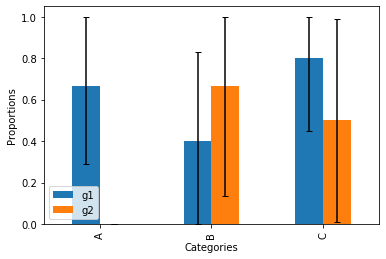

In [14]:
phjTempDF = pd.DataFrame({'group':['g1','g1','g2','g1','g2','g2','g1','g1','g2','g1'],
                          'A':['yes','yes','no','no','no','no','no','yes',np.nan,'yes'],
                          'B':['no',np.nan,np.nan,'yes','yes','yes','yes','no','no','no'],
                          'C':['yes','yes','yes',np.nan,'no','yes','yes','yes','no','no']})

print(phjTempDF)
print('\n')

phjPropDF = epy.phjCalculateBinomialProportions(phjDF = phjTempDF,
                                                phjColumnsList = ['A','B','C'],
                                                phjSuccess = 'yes',
                                                phjGroupVarName = 'group',
                                                phjMissingValue = 'missing',
                                                phjBinomialConfIntMethod = 'normal',
                                                phjAlpha = 0.05,
                                                phjPlotProportions = True,
                                                phjGroupsToPlotList = 'all',
                                                phjSortProportions = True,
                                                phjGraphTitle = None,
                                                phjPrintResults = False)

print(phjPropDF)

### FUNCTION: phjCalculateBinomialConfInts()

In [16]:
phjTempDF = pd.DataFrame({'year':[2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018],
                          'success':[109,77,80,57,29,31,29,19,10,16,6,8,4,0],
                          'failure':[784-109,840-77,715-80,780-57,743-29,743-31,752-29,645-19,509-10,562-16,471-6,471-8,472-4,0-0],
                          #'total':[784,840,715,780,743,743,752,645,509,562,471,471,472,0]
                         })

print('Original dataframe\n')
print(phjTempDF)
print('\n')

phjPropDF = epy.phjCalculateBinomialConfInts(phjDF = phjTempDF,
                                             phjSuccVarName = 'success',
                                             phjFailVarName = 'failure',
                                             phjTotalVarName = None,
                                             phjBinomialConfIntMethod = 'normal',
                                             phjAlpha = 0.05,
                                             phjPrintResults = False)
 
print('Dataframe of confidence intervals\n')
print(phjPropDF)

Original dataframe

    year  success  failure
0   2005      109      675
1   2006       77      763
2   2007       80      635
3   2008       57      723
4   2009       29      714
5   2010       31      712
6   2011       29      723
7   2012       19      626
8   2013       10      499
9   2014       16      546
10  2015        6      465
11  2016        8      463
12  2017        4      468
13  2018        0        0


Dataframe of confidence intervals

    year  success  failure  obs      prop  95CI_llim  95CI_ulim  95CI_lint  \
0   2005      109      675  784  0.139031   0.114813   0.163249   0.024218   
1   2006       77      763  840  0.091667   0.072153   0.111180   0.019514   
2   2007       80      635  715  0.111888   0.088782   0.134994   0.023106   
3   2008       57      723  780  0.073077   0.054812   0.091342   0.018265   
4   2009       29      714  743  0.039031   0.025105   0.052957   0.013926   
5   2010       31      712  743  0.041723   0.027345   0.056100   0.01

/Users/philipjones/opt/anaconda3/envs/gen-env37-pd_v1/lib/python3.7/site-packages/statsmodels/stats/proportion.py:86: RuntimeWarning: invalid value encountered in true_divide
  q_ = count * 1. / nobs


### FUNCTION: phjCalculateMultinomialProportions()

#### Example of calculating multinomial proportions (using phjCalculateMultinomialProportions() function)

      group  category  catint
0      case       NaN       1
1      case   spaniel       2
2      case   missing       3
3   control   terrier       2
4   control    collie       3
5      case  labrador       2
6      case  labrador       1
7      case    collie       2
8   control   spaniel       1
9   control   spaniel       2
10  control  labrador       3
11  control    collie       2
12     case   terrier       3
13     case   terrier       2
14     case   terrier       3
15  control    collie       1
16  control  labrador       2
17  control  labrador       3
18  control  labrador       2
19     case   spaniel       3
20     case   spaniel       2
21     case    collie       3
22     case    collie       2
23     case    collie       3
24      NaN   terrier       1
25      NaN   spaniel       2



Category levels:  ['spaniel', 'terrier', 'collie', 'labrador']
Group levels:  ['case', 'control'] 

          case_count  control_count  case_prop  control_prop  case_95CI_llim  \
spaniel

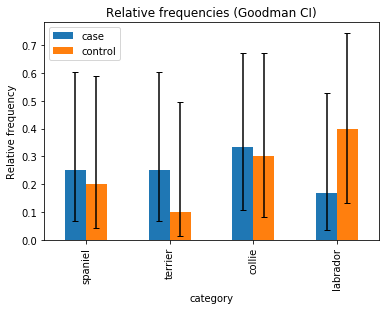

In [15]:
phjTempDF = pd.DataFrame({'group':['case','case','case','control','control','case','case','case','control','control','control','control','case','case','case','control','control','control','control','case','case','case','case','case',np.nan,np.nan],
                          'category':[np.nan,'spaniel','missing','terrier','collie','labrador','labrador','collie','spaniel','spaniel','labrador','collie','terrier','terrier','terrier','collie','labrador','labrador','labrador','spaniel','spaniel','collie','collie','collie','terrier','spaniel'],
                          'catint':[1,2,3,2,3,2,1,2,1,2,3,2,3,2,3,1,2,3,2,3,2,3,2,3,1,2]})

print(phjTempDF)
print('\n')

phjRelFreqDF = epy.phjCalculateMultinomialProportions(phjDF = phjTempDF,
                                                      phjCategoryVarName = 'category',
                                                      phjGroupVarName = 'group',
                                                      phjMissingValue = 'missing',
                                                      phjMultinomialConfIntMethod = 'goodman',
                                                      phjAlpha = 0.05,
                                                      phjPlotRelFreq = True,
                                                      phjCategoriesToPlotList = 'all',
                                                      phjGroupsToPlotList = 'all',   # Currently not implemented
                                                      phjGraphTitle = 'Relative frequencies (Goodman CI)',
                                                      phjPrintResults = True)

print(phjRelFreqDF)

### FUNCTION: phjSummaryTableToBinaryOutcomes()

In [17]:
# Generate the dataframe used in the original description of the function
df = pd.DataFrame({'year':[2010,2011,2012,2013,2014],
                   'cases':[23,34,41,57,62],
                   'controls':[1023,1243,1145,2017,1876],
                   'comment':['Small number of cases',
                              'Proportion increase',
                              'Trend continues',
                              'Decreased proportion',
                              'Increased again']})

# Reorder the columns a little
df = df[['year','cases','controls','comment']]

# Convert to dataframe containing binary outcome data
newDF = epy.phjSummaryTableToBinaryOutcomes(phjDF = df,
                                            phjVarsToIncludeList = ['year','cases','controls'],
                                            phjSuccVarName = 'cases',
                                            phjFailVarName = 'controls',
                                            phjTotalVarName = None,
                                            phjOutcomeVarName = 'outcome',
                                            phjPrintResults = False)

# Print results
print('Original table of summary results\n')
print(df)

print('\n')

print('Dataframe of binary outcomes\n')
with pd.option_context('display.max_rows',6, 'display.max_columns',2):
    print(newDF)

Original table of summary results

   year  cases  controls                comment
0  2010     23      1023  Small number of cases
1  2011     34      1243    Proportion increase
2  2012     41      1145        Trend continues
3  2013     57      2017   Decreased proportion
4  2014     62      1876        Increased again


Dataframe of binary outcomes

      year  outcome
0     2010        1
1     2010        1
2     2010        1
...    ...      ...
7518  2014        0
7519  2014        0
7520  2014        0

[7521 rows x 2 columns]


### FUNCTION: phjAnnualDiseaseTrend()

Optimization terminated successfully.
         Current function value: 0.091853
         Iterations 22


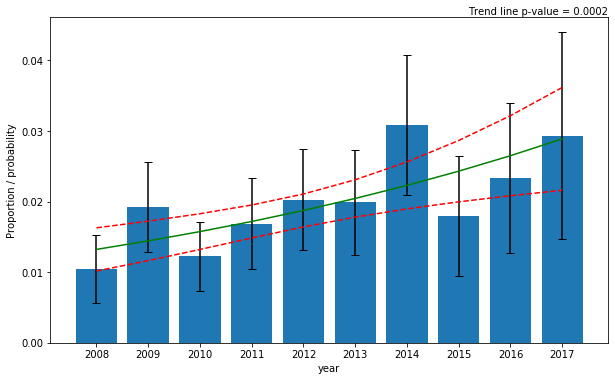

In [18]:
phjDiseaseDF = pd.DataFrame({'year':[2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018],
                             'positive':[18,34,24,26,30,27,36,17,18,15,4],
                             'negative':[1695,1733,1929,1517,1449,1329,1130,928,753,496,325]})

phjDiseaseDF = epy.phjAnnualDiseaseTrend(phjDF = phjDiseaseDF.loc[phjDiseaseDF['year'] < 2018,:],
                                         phjYearVarName = 'year',
                                         phjPositivesVarName = 'positive',
                                         phjNegativesVarName = 'negative',
                                         phjTotalVarName = None,
                                         phjConfIntMethod = 'normal',
                                         phjAlpha = 0.05,
                                         phjPlotProportions = True,
                                         phjPlotPrediction = True,
                                         phjGraphTitleStr = None,
                                         phjPrintResults = False)

---

## FILE: phjCleanUKPostcodes.py

### FUNCTION: phjCleanUKPostcodeVariable()

#### Clean postcodes based on format alone

In [3]:
# Create a test dataframe that contains a postcode variable and some other empty variables
# that have the same names as the new variables that will be created. Setting the 'phjDropExisting'
# variable to true will automatically drop pre-existing variables before running the function.
# Some of the variables in the test dataframe are not duplicated and are present to show that the
# function preserves those variables in tact.

import numpy as np
import pandas as pd
import re

# Create test dataframe
myTestPostcodeDF = pd.DataFrame({'postcode': ['NP45DG',
                                              'CH647TE',
                                              'CH5 4HE',
                                              'GIR 0AA',
                                              'NOT NOWN',
                                              'GIR0AB',
                                              'NOR12A',
                                              'no idea',
                                              'W1A 1AA',
                                              'missin',
                                              'NP4  OGH',
                                              'P012 OLL',
                                              'p01s',
                                              'ABCD',
                                              '',
                                              'ab123cd',
                                              'un-known',
                                              'B1    INJ',
                                              'AB123CD',
                                              'No idea what the postcode is',
                                              '    ???NP4-5DG_*#   '],
                                 'pcdClean': np.nan,
                                 'pcd7': np.nan,
                                 'postcodeOutward': np.nan,
                                 'someOtherCol': np.nan})

# Run function to extract postcode data
print('\nStart dataframe\n===============\n')
print(myTestPostcodeDF)
print('\n')

myTestPostcodeDF = epy.phjCleanUKPostcodeVariable(phjDF = myTestPostcodeDF,
                                                  phjRealPostcodeSer = None,
                                                  phjOrigPostcodeVarName = 'postcode',
                                                  phjNewPostcodeVarName = 'pcdClean',
                                                  phjNewPostcodeStrLenVarName = 'pcdCleanStrLen',
                                                  phjPostcodeCheckVarName = 'pcdFormatCheck',
                                                  phjMissingValueCode = 'missing',
                                                  phjMinDamerauLevenshteinDistanceVarName = 'minDamLevDist',
                                                  phjBestAlternativesVarName = 'bestAlternatives',
                                                  phjPostcode7VarName = 'pcd7',
                                                  phjPostcodeAreaVarName = 'pcdArea',
                                                  phjSalvageOutwardPostcodeComponent = True,
                                                  phjCheckByOption = 'format',
                                                  phjDropExisting = True,
                                                  phjPrintResults = True)

print('\nReturned dataframe\n==================\n')
print(myTestPostcodeDF)


Start dataframe

                        postcode  pcdClean  pcd7  postcodeOutward  \
0                         NP45DG       NaN   NaN              NaN   
1                        CH647TE       NaN   NaN              NaN   
2                        CH5 4HE       NaN   NaN              NaN   
3                        GIR 0AA       NaN   NaN              NaN   
4                       NOT NOWN       NaN   NaN              NaN   
5                         GIR0AB       NaN   NaN              NaN   
6                         NOR12A       NaN   NaN              NaN   
7                        no idea       NaN   NaN              NaN   
8                        W1A 1AA       NaN   NaN              NaN   
9                         missin       NaN   NaN              NaN   
10                      NP4  OGH       NaN   NaN              NaN   
11                      P012 OLL       NaN   NaN              NaN   
12                          p01s       NaN   NaN              NaN   
13              

/Users/philipjones/opt/anaconda3/envs/gen-env37-pd_v1/lib/python3.7/site-packages/pandas/core/strings.py:1952: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)
/Users/philipjones/opt/anaconda3/envs/gen-env37-pd_v1/lib/python3.7/site-packages/pandas/core/strings.py:1952: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)
/Users/philipjones/opt/anaconda3/envs/gen-env37-pd_v1/lib/python3.7/site-packages/pandas/core/strings.py:1952: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


#### Clean postcodes based on real postcode and identify closest matches

In [5]:
import re

# N.B. When calculating best alternative postcodes, only postcodes that are within
# 1 DL distance are considered.

# Create a Pandas series that could contain all the postcodes in the UK
realPostcodesSer = pd.Series(['NP4 5DG','CH647TE','CH5 4HE','W1A 1AA','NP4 0GH','PO120LL','AB123CF','AB124DF','AB123CV'])

# Create test dataframe
myTestPostcodeDF = pd.DataFrame({'postcode': ['NP45DG',
                                              'CH647TE',
                                              'CH5 4HE',
                                              'GIR 0AA',
                                              'NOT NOWN',
                                              'GIR0AB',
                                              'NOR12A',
                                              'no idea',
                                              'W1A 1AA',
                                              'missin',
                                              'NP4  OGH',
                                              'P012 OLL',
                                              'p01s',
                                              'ABCD',
                                              '',
                                              'ab123cd',
                                              'un-known',
                                              'B1    INJ',
                                              'AB123CD',
                                              'No idea what the postcode is',
                                              '    ???NP4-5DG_*#   '],
                                 'pcdClean': np.nan,
                                 'pcd7': np.nan,
                                 'postcodeOutward': np.nan,
                                 'someOtherCol': np.nan})

# Run function to extract postcode data
print('\nStart dataframe\n===============\n')
print(myTestPostcodeDF)
print('\n')

myTestPostcodeDF = epy.phjCleanUKPostcodeVariable(phjDF = myTestPostcodeDF,
                                                  phjRealPostcodeSer = realPostcodesSer,
                                                  phjOrigPostcodeVarName = 'postcode',
                                                  phjNewPostcodeVarName = 'pcdClean',
                                                  phjNewPostcodeStrLenVarName = 'pcdCleanStrLen',
                                                  phjPostcodeCheckVarName = 'pcdFormatCheck',
                                                  phjMissingValueCode = 'missing',
                                                  phjMinDamerauLevenshteinDistanceVarName = 'minDamLevDist',
                                                  phjBestAlternativesVarName = 'bestAlternatives',
                                                  phjPostcode7VarName = 'pcd7',
                                                  phjPostcodeAreaVarName = 'pcdArea',
                                                  phjSalvageOutwardPostcodeComponent = True,
                                                  phjCheckByOption = 'dictionary',
                                                  phjDropExisting = True,
                                                  phjPrintResults = True)

print('\nReturned dataframe\n==================\n')
print(myTestPostcodeDF)


Start dataframe

                        postcode  pcdClean  pcd7  postcodeOutward  \
0                         NP45DG       NaN   NaN              NaN   
1                        CH647TE       NaN   NaN              NaN   
2                        CH5 4HE       NaN   NaN              NaN   
3                        GIR 0AA       NaN   NaN              NaN   
4                       NOT NOWN       NaN   NaN              NaN   
5                         GIR0AB       NaN   NaN              NaN   
6                         NOR12A       NaN   NaN              NaN   
7                        no idea       NaN   NaN              NaN   
8                        W1A 1AA       NaN   NaN              NaN   
9                         missin       NaN   NaN              NaN   
10                      NP4  OGH       NaN   NaN              NaN   
11                      P012 OLL       NaN   NaN              NaN   
12                          p01s       NaN   NaN              NaN   
13              

### FUNCTION: phjPostcodeFormat7()

---

## FILE: phjSelectData.py

### FUNCTION: phjGenerateCaseControlDataset()

### FUNCTION: phjSelectCaseControlDataset()

#### Unmatched controls

In [7]:
casesDF = pd.DataFrame({'animalID':[1,2,3,4,5],'var1':[43,45,34,45,56],'sp':['dog','dog','dog','dog','dog']})
potControlsDF = pd.DataFrame({'animalID':[11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30],
                              'var1':[34,54,34,23,34,45,56,67,56,67,78,98,65,54,34,76,87,56,45,34],
                              'sp':['dog','cat','dog','dog','cat','dog','cat','dog','cat','dog',
                                    'dog','dog','dog','cat','dog','cat','dog','dog','dog','cat']})

print("This dataframe contains all the cases of disease\n")
print(casesDF)
print("\n")
print("This dataframe contains all the animals you could potentially use as controls\n")
print(potControlsDF)
print("\n")

# Selecting unmatched controls
unmatchedDF = epy.phjSelectCaseControlDataset(phjCasesDF = casesDF,
                                              phjPotentialControlsDF = potControlsDF,
                                              phjUniqueIdentifierVarName = 'animalID',
                                              phjMatchingVariablesList = None,
                                              phjControlsPerCaseInt = 2,
                                              phjPrintResults = False)

print(unmatchedDF)

This dataframe contains all the cases of disease

   animalID  var1   sp
0         1    43  dog
1         2    45  dog
2         3    34  dog
3         4    45  dog
4         5    56  dog


This dataframe contains all the animals you could potentially use as controls

    animalID  var1   sp
0         11    34  dog
1         12    54  cat
2         13    34  dog
3         14    23  dog
4         15    34  cat
5         16    45  dog
6         17    56  cat
7         18    67  dog
8         19    56  cat
9         20    67  dog
10        21    78  dog
11        22    98  dog
12        23    65  dog
13        24    54  cat
14        25    34  dog
15        26    76  cat
16        27    87  dog
17        28    56  dog
18        29    45  dog
19        30    34  cat


    case  animalID
0      1         1
1      1         2
2      1         3
3      1         4
4      1         5
5      0        18
6      0        25
7      0        24
8      0        14
9      0        22
10     0        

#### Matched controls

In [8]:
casesDF = pd.DataFrame({'animalID':[1,2,3,4,5],'var1':[43,45,34,45,56],'sp':['dog','dog','dog','dog','dog']})
potControlsDF = pd.DataFrame({'animalID':[11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30],
                              'var1':[34,54,34,23,34,45,56,67,56,67,78,98,65,54,34,76,87,56,45,34],
                              'sp':['dog','cat','dog','dog','cat','dog','cat','dog','cat','dog',
                                    'dog','dog','dog','cat','dog','cat','dog','dog','dog','cat']})

print("This dataframe contains all the cases of disease\n")
print(casesDF)
print("\n")
print("This dataframe contains all the animals you could potentially use as controls\n")
print(potControlsDF)
print("\n")

# Selecting controls that are matched to cases on variable 'sp'
matchedDF = epy.phjSelectCaseControlDataset(phjCasesDF = casesDF,
                                            phjPotentialControlsDF = potControlsDF,
                                            phjUniqueIdentifierVarName = 'animalID',
                                            phjMatchingVariablesList = ['sp'],
                                            phjControlsPerCaseInt = 2,
                                            phjPrintResults = False)

print(matchedDF)

This dataframe contains all the cases of disease

   animalID  var1   sp
0         1    43  dog
1         2    45  dog
2         3    34  dog
3         4    45  dog
4         5    56  dog


This dataframe contains all the animals you could potentially use as controls

    animalID  var1   sp
0         11    34  dog
1         12    54  cat
2         13    34  dog
3         14    23  dog
4         15    34  cat
5         16    45  dog
6         17    56  cat
7         18    67  dog
8         19    56  cat
9         20    67  dog
10        21    78  dog
11        22    98  dog
12        23    65  dog
13        24    54  cat
14        25    34  dog
15        26    76  cat
16        27    87  dog
17        28    56  dog
18        29    45  dog
19        30    34  cat




AttributeError: 'DataFrame' object has no attribute 'ix'

### FUNCTION: phjCollapseOnPatientID()

---

## FILE: phjCleanData.py

### FUNCTION: phjParseDateVar()

---

## FILE: phjExploreData.py

### FUNCTION: phjViewLogOdds()
Example of viewing log odds plotted against mid-point of categories.

#### Categorise using Jenks breaks and using 'yes' and 'no' as binary outcome

In [6]:
# Define example dataset
phjTempDF = pd.DataFrame({'binDepVar':['yes']*50000 + ['no']*50000,
                          'riskFactorCont':np.random.uniform(0,1,100000)})

with pd.option_context('display.max_rows', 10, 'display.max_columns', 5):
    print(phjTempDF)

    
# View log odds
phjTempDF = epy.phjViewLogOdds(phjTempDF = phjTempDF,
                               phjBinaryDepVarName = 'binDepVar',
                               phjContIndepVarName = 'riskFactorCont',
                               phjCaseValue = 'yes',
                               phjMissingValue = 'missing',
                               phjNumberOfCategoriesInt = 5,
                               phjNewCategoryVarName = 'categoricalVar',
                               phjCategorisationMethod = 'jenks',
                               phjGroupNameVar = None,
                               phjPrintResults = False)

with pd.option_context('display.max_rows', 10, 'display.max_columns', 10):
    print('Log odds for categorised variable')
    print(phjTempDF)

      binDepVar  riskFactorCont
0           yes        0.781663
1           yes        0.524304
2           yes        0.148153
3           yes        0.085513
4           yes        0.575465
...         ...             ...
99995        no        0.211418
99996        no        0.458209
99997        no        0.447410
99998        no        0.222476
99999        no        0.198317

[100000 rows x 2 columns]


TypeError: phjViewLogOdds() got an unexpected keyword argument 'phjTempDF'

#### Categorise using quantile breaks and using 1 and 0 as binary outcome

In [ ]:
# Define example dataset
phjTempDF = pd.DataFrame({'binDepVar':[1]*50000 + [0]*50000,
                          'riskFactorCont':np.random.uniform(0,1,100000)})

with pd.option_context('display.max_rows', 10, 'display.max_columns', 5):
    print(phjTempDF)

    
# View log odds
phjTempDF = epy.phjViewLogOdds(phjTempDF = phjTempDF,
                               phjBinaryDepVarName = 'binDepVar',
                               phjContIndepVarName = 'riskFactorCont',
                               phjCaseValue = 1,
                               phjMissingValue = 'missing',
                               phjNumberOfCategoriesInt = 8,
                               phjNewCategoryVarName = 'categoricalVar',
                               phjCategorisationMethod = 'quantile',
                               phjGroupNameVar = None,
                               phjPrintResults = False)

with pd.option_context('display.max_rows', 10, 'display.max_columns', 10):
    print('Log odds for categorised variable')
    print(phjTempDF)

### FUNCTION: phjCategoriseContinuousVariable()

#### Return dataframe alone

In [ ]:
# Define example dataset
phjTempDF = pd.DataFrame({'binDepVar':['yes']*50000 + ['no']*50000,
                          'riskFactorCont':np.random.uniform(0,1,100000)})

with pd.option_context('display.max_rows', 10, 'display.max_columns', 5):
    print(phjTempDF)

    
# Categorise a continuous variable
phjTempDF = epy.phjCategoriseContinuousVariable(phjTempDF = phjTempDF,
                                                phjContinuousVarName = 'riskFactorCont',
                                                phjMissingValue = 'missing',
                                                phjNumberOfCategoriesInt = 6,
                                                phjNewCategoryVarName = 'catVar',
                                                phjCategorisationMethod = 'jenks',
                                                phjReturnBreaks = False,
                                                phjPrintResults = False)

with pd.option_context('display.max_rows', 10, 'display.max_columns', 5):
    print('\nLog odds for categorised variable')
    print(phjTempDF)

#### Return dataframe and list of breaks

In [ ]:
# Define example dataset
phjTempDF = pd.DataFrame({'binDepVar':['yes']*50000 + ['no']*50000,
                          'riskFactorCont':np.random.uniform(0,1,100000)})

with pd.option_context('display.max_rows', 10, 'display.max_columns', 5):
    print(phjTempDF)

    
# Categorise a continuous variable
phjTempDF, phjBreaksList = epy.phjCategoriseContinuousVariable(phjTempDF = phjTempDF,
                                                               phjContinuousVarName = 'riskFactorCont',
                                                               phjMissingValue = 'missing',
                                                               phjNumberOfCategoriesInt = 6,
                                                               phjNewCategoryVarName = 'catVar',
                                                               phjCategorisationMethod = 'jenks',
                                                               phjReturnBreaks = True,
                                                               phjPrintResults = False)

with pd.option_context('display.max_rows', 10, 'display.max_columns', 5):
    print('\nCategorised variable')
    print(phjTempDF)
    print('\n')
    print('Breaks')
    print(phjBreaksList)

---

## FILE: phjRROR.py

### FUNCTION: phjOddsRatio()

### FUNCTION: phjRelativeRisk()

---